https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

### Imports

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Functions

In [53]:
def create_dataset(N,a,b,x,y):
    X = np.random.random((N,2))*x - y
    Y = np.cos(a*X[:,0]) + np.cos(b*X[:,1])
    
    return X,Y


def to_torch(X,mode=0):
    if mode==0: 
        return torch.from_numpy(X.astype(np.float32))

    elif mode==1:
        return torch.from_numpy(X.astype(np.int64))
    

def create_model_and_train(X_train,Y_train,n_epochs=1000):
    
    model = nn.Sequential(
        nn.Linear(64,3),
#         nn.ReLU(),
#         nn.Linear(32,3)
    )
#     criterion = nn.MSELoss()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    
    
    inputs  = to_torch(X_train,mode=0)
    targets = to_torch(Y_train,mode=1)
    
    
    train_losses = np.zeros(n_epochs)
    
    
    for it in range(n_epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs, torch.max(targets, 1)[1])
#         loss = criterion(outputs, targets)
        train_losses[it]=loss.item()
        
        loss.backward()
        optimizer.step()
        
        
        if it%10==0:
            print("{:20}".format(f"epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}"))
        
    return model ,train_losses


def plot_metric(data, metric):
    plt.plot(data, label=f"train {metric}")
    plt.legend()
    plt.show

### Create dataset

In [54]:
# type(create_dataset(100,1,1,1,1)[0][0])

In [55]:
X = np.array([
    np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]),
    np.array([0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0, 0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
    np.array([0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0]),
])

Y = np.array([
    np.array([0,0,1]),
    np.array([0,1,0]),
    np.array([1,0,0]),
])

### Create and train model

In [56]:
model ,train_losses = create_model_and_train(X,Y,n_epochs=100)

epoch 1/100, Train Loss: 1.1823
epoch 11/100, Train Loss: 0.4877
epoch 21/100, Train Loss: 0.2029
epoch 31/100, Train Loss: 0.1024
epoch 41/100, Train Loss: 0.0625
epoch 51/100, Train Loss: 0.0442
epoch 61/100, Train Loss: 0.0343
epoch 71/100, Train Loss: 0.0281
epoch 81/100, Train Loss: 0.0238
epoch 91/100, Train Loss: 0.0206


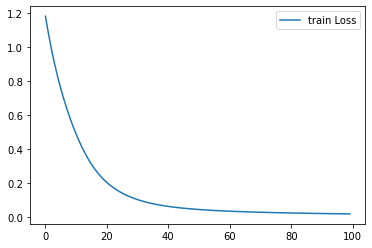

In [57]:
plot_metric(train_losses, "Loss")

In [58]:
inputs  = to_torch(X,mode=0)

In [59]:
model(inputs)

tensor([[-0.6268, -1.5449,  3.3842],
        [-1.7499,  3.5401, -1.5678],
        [ 3.5124, -2.1116, -0.7022]], grad_fn=<AddmmBackward>)